In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plot
import os

In [11]:
print("Working directory:", os.getcwd())


Working directory: C:\Users\somus


In [5]:
db_path="sales_data.db"
conn=sqlite3.connect(db_path)
cur=conn.cursor()

cur.execute("""
create table if not exists sales(
    id integer primary key autoincrement, product text not null, quantity integer not null, price real not null, order_date text)
""")
conn.commit()

In [7]:
sample_rows=[
    ("Widget",2,10.0,"2025-11-01"),
    ("Widget",3,10.0,"2025-11-02"),
    ("Gadget",1,25.0,"2025-11-02"),
    ("Gadget",2,25.0,"2025-11-03"),
    ("Doodle",4,5.0,"2025-11-03"),
]

cur.executemany("insert into sales (product, quantity,price, order_date) values (?,?,?,?)", sample_rows)

conn.commit()

print(f"Inserted {len(sample_rows)} sample rows into {db_path}")

Inserted 5 sample rows into sales_data.db


In [8]:
query=""" 
    select product, sum(quantity) as total_qty, sum(quantity*price) as revenue from sales group by product order by revenue desc
    """
df=pd.read_sql_query(query, conn)

In [9]:
print("sales summary (by product):")
print(df)

sales summary (by product):
  product  total_qty  revenue
0  Gadget          3     75.0
1  Widget          5     50.0
2  Doodle          4     20.0


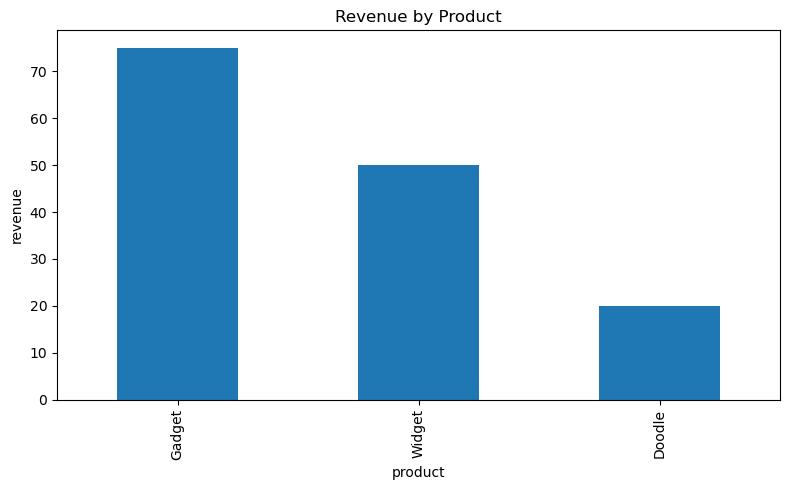

Chart saved to sales_chart.png


In [14]:
ax= df.plot(kind='bar', x='product', y='revenue', legend=False, figsize=(8,5))
ax.set_ylabel("revenue")
ax.set_title("Revenue by Product")
plot.tight_layout()
chart_path="sales_chart.png"
plot.savefig(chart_path)
plot.show()
print(f"Chart saved to {chart_path}")
